In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
%%time
case = pd.read_csv('case_clean.csv')
comm = pd.read_csv('comm_clean.csv')
template = pd.read_csv('template_clean.csv')

print("CaseDetails:", case.shape)
print("Communications:", comm.shape)
print("Templates:", template.shape)

CaseDetails: (1699508, 5)
Communications: (1462370, 5)
Templates: (5971, 5)
CPU times: user 10.3 s, sys: 804 ms, total: 11.1 s
Wall time: 11.5 s


In [3]:
# %%time
# case_full = pd.read_csv('case.csv')
# comm_full = pd.read_csv('communication.csv')
# template_full = pd.read_csv('template.csv')

# print("CaseDetails:", case_full.shape)
# print("Communications:", comm_full.shape)
# print("Templates:", template_full.shape)

In [4]:
case.head(1)

,Unnamed: 0,CorpNo,CaseID,cleaned_title,cleaned_description
0,0,11918,3202532,Phone Call From,"Hello, this is the same Thing. Why, why Why Is..."


In [5]:
comm.head(1)

,Unnamed: 0,CaseID,CaseCommunicationId,TemplateId,cleaned_message
0,2113601,724987.0,741900.0,NaN,Hi Janet. Please go to our district website De...


In [6]:
template.head(1)

,Unnamed: 0,TemplateId,Name,MainCorpNo,cleaned_MessageBody
0,0,1,title,11918,[[Click here]]Login into account hello whats u...


### # of cases solved with templates

In [7]:
matched_df = case.merge(comm, on = ['CaseID'], how='inner').merge(template, on=['TemplateId'], how='inner')
matched_df = matched_df[['CorpNo', 'CaseID', 'cleaned_description', 'TemplateId', 'cleaned_message', 'cleaned_MessageBody']]
matched_df.to_csv('full_df_w_templates.csv', index=False)
print(matched_df.shape)

(57214, 6)


In [8]:
cleaned_df = pd.read_csv("full_df_w_templates.csv")
cleaned_df.shape

(57214, 6)

In [9]:
cleaned_df.shape[0]/case.shape[0]

0.0336650371754649

### Template Distribution

In [10]:
# check total number of templates contained in each school district
template_num = pd.DataFrame(template.groupby('MainCorpNo')['TemplateId'].nunique()).sort_values(by='TemplateId', ascending=False)
template_num.head()

,TemplateId
MainCorpNo,
45671,504
46543,450
46769,428
50566,278
30930,259


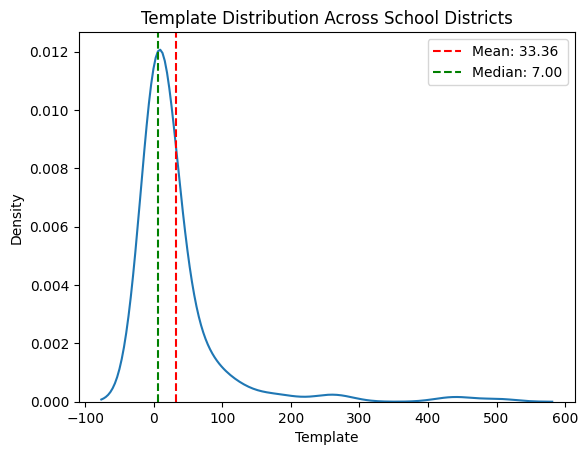

In [11]:
# check the distribution of templates across all school district
sns.kdeplot(template_num['TemplateId'])

mean = np.mean(template_num['TemplateId'])
median = np.median(template_num['TemplateId'])

# Add vertical lines for mean and median
plt.axvline(mean, color='red', linestyle='dashed', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle='dashed', label=f'Median: {median:.2f}')

plt.title('Template Distribution Across School Districts')
plt.xlabel('Template')
# Add legend
plt.legend()
plt.show()

In [12]:
template_num.describe()

,TemplateId
count,179.000000
mean,33.357542
std,72.668059
min,1.000000
25%,4.000000
50%,7.000000
75%,27.500000
max,504.000000


### Case Distribution

In [13]:
# check total number of templates contained in each school district
case_num = pd.DataFrame(case.groupby('CorpNo')['CaseID'].nunique()).sort_values(by='CaseID', ascending=False)
case_num.head()

,CaseID
CorpNo,
50566,180353
46769,103294
24936,76042
45671,72443
32236,58529


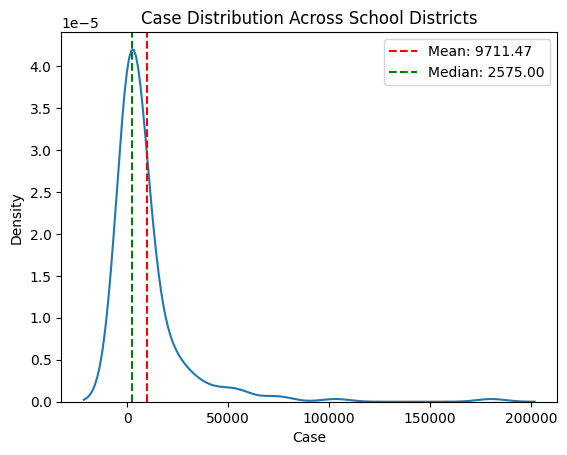

In [14]:
# check the distribution of case across all school district
sns.kdeplot(case_num['CaseID'])

mean = np.mean(case_num['CaseID'])
median = np.median(case_num['CaseID'])

# Add vertical lines for mean and median
plt.axvline(mean, color='red', linestyle='dashed', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle='dashed', label=f'Median: {median:.2f}')

plt.title('Case Distribution Across School Districts')
plt.xlabel('Case')
# Add legend
plt.legend()
plt.show()

### Communication Distribution

In [14]:
merged = comm.merge(case, on='CaseID', how='left')
print(merged.shape)
merged.head()

(1462370, 9)


,Unnamed: 0_x,CaseID,CaseCommunicationId,TemplateId,cleaned_message,Unnamed: 0_y,CorpNo,cleaned_title,cleaned_description
0,2113601,724987.0,741900.0,NaN,Hi Janet. Please go to our district website De...,1569663.0,31460.0,Out of state student,"Hi, my name is Janet and my family and I will ..."
1,2106764,724988.0,741335.0,NaN,The office is open and you can come by and reg...,1460322.0,12313.0,Enrollment,How can I enroll my child into Saddleback this...
2,2113600,724989.0,741516.0,NaN,"Good morning,Thank you for contacting us and w...",1526604.0,19106.0,New Students,"Hi, My family and I will be moving to Lincoln ..."
3,2113604,724993.0,741998.0,NaN,"Good morning,According to our records, the ema...",1691903.0,46543.0,sign in,we are attempting to do the annual data update...
4,2113606,724998.0,742580.0,NaN,Hi Lynniessa - sounds great. A 1-year old woul...,1509022.0,14434.0,About your swim classes,I have a 1 yr old that I would love to bring h...


In [15]:
# check total number of communications contained in each school district
comm_num = pd.DataFrame(merged.groupby('CorpNo')['CaseCommunicationId'].nunique()).sort_values(by='CaseCommunicationId', ascending=False)
comm_num.head()

,CaseCommunicationId
CorpNo,
50566.0,126484
46769.0,86890
45671.0,60704
24936.0,44934
32114.0,39486


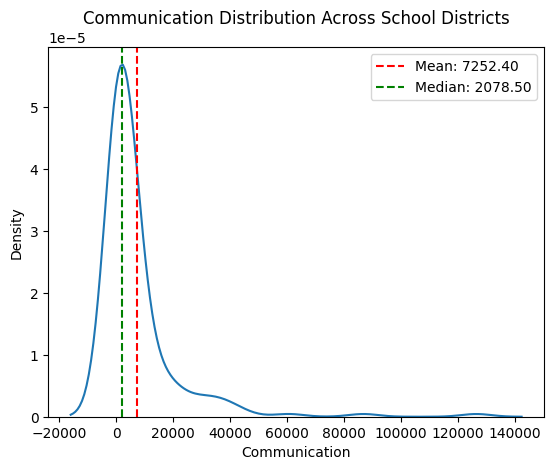

In [16]:
# check the distribution of case across all school district
sns.kdeplot(comm_num['CaseCommunicationId'])

mean = np.mean(comm_num['CaseCommunicationId'])
median = np.median(comm_num['CaseCommunicationId'])

# Add vertical lines for mean and median
plt.axvline(mean, color='red', linestyle='dashed', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle='dashed', label=f'Median: {median:.2f}')

plt.title('Communication Distribution Across School Districts')
plt.xlabel('Communication')
# Add legend
plt.legend()
plt.show()

In [17]:
comm.head()

,Unnamed: 0,CaseID,CaseCommunicationId,TemplateId,cleaned_message
0,2113601,724987.0,741900.0,NaN,Hi Janet. Please go to our district website De...
1,2106764,724988.0,741335.0,NaN,The office is open and you can come by and reg...
2,2113600,724989.0,741516.0,NaN,"Good morning,Thank you for contacting us and w..."
3,2113604,724993.0,741998.0,NaN,"Good morning,According to our records, the ema..."
4,2113606,724998.0,742580.0,NaN,Hi Lynniessa - sounds great. A 1-year old woul...


### Communication w/ templates

In [18]:
cleaned_df.head()

,CorpNo,CaseID,cleaned_description,TemplateId,cleaned_message,cleaned_MessageBody
0,31460,2214871,Parker Wix's chromebook will not turn on witho...,900.0,Jaclyn Nicole Wix If you submit a work order t...,[[Customer’s Name]] If you submit a work order...
1,31460,1613367,My microphone is not working and I have allowe...,900.0,"Rachel, If you submit a work order to the tech...",[[Customer’s Name]] If you submit a work order...
2,31460,1673400,Can I have someone put the google drive link o...,900.0,Debbie BradleyYou can try to log in your Googl...,[[Customer’s Name]] If you submit a work order...
3,31460,1737761,"My projector keeps shutting off, it doesn't sa...",900.0,Karlee Sikes If you submit a work order to the...,[[Customer’s Name]] If you submit a work order...
4,31460,1757270,I can't figure out how to work the Document Ca...,900.0,Alexandra (Allie) Foshee If you submit a work ...,[[Customer’s Name]] If you submit a work order...


In [ ]:
# check total number of communications that used templates contained in each school district
df_num = pd.DataFrame(cleaned_df.groupby('CorpNo')['CaseCommunicationId'].nunique()).sort_values(by='CaseCommunicationId', ascending=False)
df_num.head()

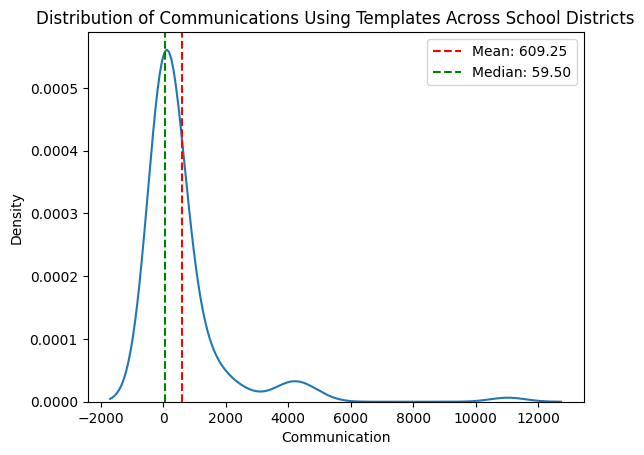

In [33]:
# check the distribution of matched templates across all school district
sns.kdeplot(df_num['CaseCommunicationId'])

mean = np.mean(df_num['CaseCommunicationId'])
median = np.median(df_num['CaseCommunicationId'])

# Add vertical lines for mean and median
plt.axvline(mean, color='red', linestyle='dashed', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle='dashed', label=f'Median: {median:.2f}')

plt.title('Distribution of Communications Using Templates Across School Districts')
plt.xlabel('Communication')
# Add legend
plt.legend()
plt.show()

In [29]:
cleaned_df.groupby('MainCorpNo').count().sort_values(by='CaseID', ascending=False).head(10)

,CorpNo,CaseID,cleaned_title,cleaned_description,CaseCommunicationId,TemplateId,cleaned_message,Name,cleaned_MessageBody
MainCorpNo,,,,,,,,,
50566,11031,11031,11026,11031,11031,11031,11031,11031,11031
44070,4810,4810,4799,4810,4810,4810,4810,4810,4810
48928,4591,4591,4508,4591,4591,4591,4591,4591,4591
45671,4216,4216,4210,4216,4216,4216,4216,4216,4216
30930,4152,4152,4145,4152,4152,4152,4152,4152,4152
46769,3936,3936,3936,3936,3936,3936,3936,3936,3936
32236,3840,3840,3839,3840,3840,3840,3840,3840,3840
44884,2542,2542,2540,2542,2542,2542,2542,2542,2542
25077,2478,2478,2478,2478,2478,2478,2478,2478,2478


In [30]:
comm['CaseID'].value_counts()

CaseID
3023972.0    161
3329528.0     85
3890068.0     74
1856078.0     68
1169293.0     65
            ... 
2843246.0      1
2843252.0      1
2843253.0      1
2843247.0      1
1505145.0      1
Name: count, Length: 1462370, dtype: int64

In [31]:
comm[comm['CaseID'] == 3023972.0]

,Unnamed: 0,CaseID,CaseCommunicationId,TemplateId,cleaned_message
1198095,1198095,3023972.0,3578288.0,NaN,Orlando Lapaz Customer Engagement Specialist ...
1198096,1198096,3023972.0,3570170.0,NaN,Email address not associated with this Dialogu...
1198097,1198097,3023972.0,3570171.0,NaN,Email address not associated with this Dialogu...
1198104,1198104,3023972.0,3570172.0,NaN,Email address not associated with this Dialogu...
1198105,1198105,3023972.0,3570173.0,NaN,Email address not associated with this Dialogu...
...,...,...,...,...,...
1198348,1198348,3023972.0,3595989.0,NaN,Email address not associated with this Dialogu...
1198349,1198349,3023972.0,3595994.0,NaN,Email address not associated with this Dialogu...
1198350,1198350,3023972.0,3595995.0,NaN,Email address not associated with this Dialogu...
1198351,1198351,3023972.0,3595996.0,NaN,Email address not associated with this Dialogu...


In [26]:
case[case['CaseID'] == 3023972.0]

,Unnamed: 0,CorpNo,CaseID,cleaned_title,cleaned_description
961921,961959,69866,3023972,Email address not associated with this Dialogue.,Email address not associated with this Dialog...


In [30]:
print(template[template['TemplateId'] == 1597].cleaned_MessageBody.values[0])

Greetings, We have not yet received a response to our request for additional information in order to fully answer your inquiry. Accordingly, we are closing this dialogue. If you still need assistance, please don't hesitate to open a new Let's Talk Dialogue from our website or contact the Office of Student Assignment & Records at (404) 802-2233. Thank you again for reaching out to the APS Office of Student Assignment & Records! Kind Regards,


### template utilization within top5 districts (have the most number of cases)

In [15]:
case_num.head()

,CaseID
CorpNo,
50566,180353
46769,103294
24936,76042
45671,72443
32236,58529


In [16]:
matched_df.head()

,CorpNo,CaseID,cleaned_description,TemplateId,cleaned_message,cleaned_MessageBody
0,31460,2214871,Parker Wix's chromebook will not turn on witho...,900.0,Jaclyn Nicole Wix If you submit a work order t...,[[Customer’s Name]] If you submit a work order...
1,31460,1613367,My microphone is not working and I have allowe...,900.0,"Rachel, If you submit a work order to the tech...",[[Customer’s Name]] If you submit a work order...
2,31460,1673400,Can I have someone put the google drive link o...,900.0,Debbie BradleyYou can try to log in your Googl...,[[Customer’s Name]] If you submit a work order...
3,31460,1737761,"My projector keeps shutting off, it doesn't sa...",900.0,Karlee Sikes If you submit a work order to the...,[[Customer’s Name]] If you submit a work order...
4,31460,1757270,I can't figure out how to work the Document Ca...,900.0,Alexandra (Allie) Foshee If you submit a work ...,[[Customer’s Name]] If you submit a work order...


In [17]:
matched_num = pd.DataFrame(matched_df.groupby('CorpNo')['CaseID'].nunique()).sort_values(by='CaseID', ascending=False)
matched_num.head()

,CaseID
CorpNo,
50566,10017
44070,4410
45671,3874
46769,3475
48928,3398


In [18]:
dist = case_num.merge(matched_num, on =['CorpNo'], how = 'left')
dist.columns = ['Case_num', 'Matched_num']
dist['percentage'] = dist['Matched_num']/dist['Case_num']
dist.sort_values(by='Case_num', ascending=False).head(5)

,Case_num,Matched_num,percentage
CorpNo,,,
50566,180353,10017.0,0.055541
46769,103294,3475.0,0.033642
24936,76042,157.0,0.002065
45671,72443,3874.0,0.053477
32236,58529,2898.0,0.049514


In [19]:
dist.sort_values(by='Case_num', ascending=False).head(10)['percentage'].values.mean()

0.03758431089776722

In [22]:
top5 = dist.sort_values(by='Case_num', ascending=False).head(5).reset_index()

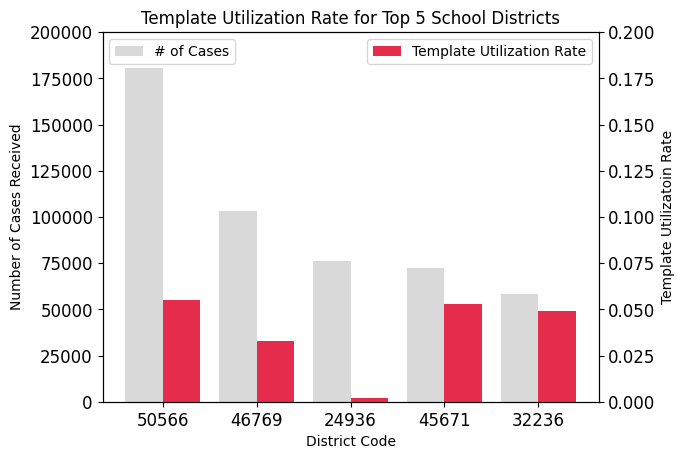

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.arange(1, 6)  # Common y-axis values (e.g., categories)
y1 = [180353, 103294, 76042, 72443, 58529]  # Data for the first x-axis
y2 = [0.055, 0.033, 0.002, 0.053, 0.049]  # Data for the second x-axis

fig, ax1 = plt.subplots()

# First bar chart
ax1.bar(x - 0.2, y1, width=0.4, label='# of Cases', color='#d9d9d9')

# Setting up the second y-axis
ax2 = ax1.twinx()
ax2.bar(x + 0.2, y2, width=0.4, label='Template Utilization Rate', color='#e52c4c')


custom_labels = ['50566', '46769', '24936', '45671', '32236']  # Replace with your desired labels
plt.xticks(x, custom_labels)

# Setting the y-axis limits
ax1.set_ylim(0, 200000)  # Set y1-axis limits
ax2.set_ylim(0, 0.2)  # Optionally set y2-axis limits if needed

# Adjusting tick size (optional)
ax1.tick_params(axis='y', labelsize='large')
ax2.tick_params(axis='y', labelsize='large')
ax1.tick_params(axis='x', labelsize='large')

# Labels and title
ax1.set_xlabel('District Code')
ax1.set_ylabel('Number of Cases Received')
ax2.set_ylabel('Template Utilizatoin Rate')


# Adding a legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.title('Template Utilization Rate for Top 5 School Districts')
plt.show()


### pie

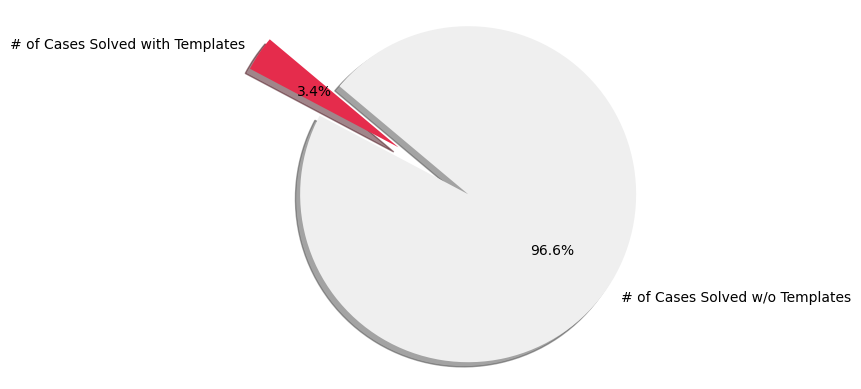

In [20]:
import matplotlib.pyplot as plt

# Data to plot
labels = ['# of Cases Solved with Templates','# of Cases Solved w/o Templates']
sizes = [cleaned_df.shape[0], case.shape[0]-cleaned_df.shape[0]]
colors = ['#e52c4c', '#efefef']
explode = (0.5, 0)  # explode 1st slice (Python)

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

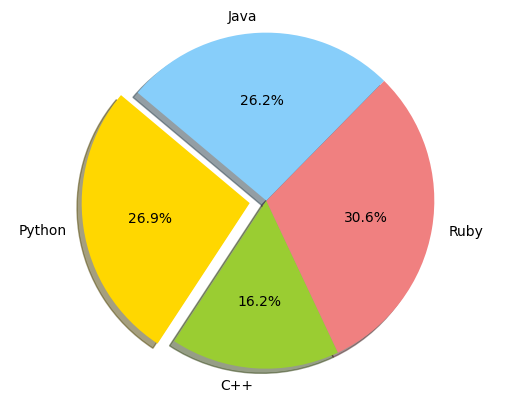

In [5]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'Python', 'C++', 'Ruby', 'Java'
sizes = [215, 130, 245, 210]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice (Python)

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


### Get case info

In [7]:
district = 55041
case_sample = case[case['CorpNo'] == district]
template_sample = template[template['MainCorpNo'] == district]
samples = case_sample.merge(comm, on=['CaseID'], how='inner').merge(template_sample, on='TemplateId', how='left')
samples = samples[['CorpNo', 'CaseID', 'cleaned_description', 'TemplateId', 'cleaned_message', 'cleaned_MessageBody']]
samples.shape

(6484, 6)

In [8]:
matched = samples.dropna()
unmatched = samples[samples['TemplateId'].isna()]

#### Samples with matched templates

In [9]:
for i in range(10):
    
    print(f'case #: {matched.CaseID.values[i]}')
    print(f'Message: \n {matched.cleaned_description.values[i]}') 
    print(f'template #: {matched.TemplateId.values[i]}')
    print(f'Template used: \n{matched.cleaned_MessageBody.values[i]}\n')
    

case #: 3560736
Message: 
 i cant login into my ccisd accountI'm a tutor i want to put my work hours 
template #: 2943.0
Template used: 
Employees may reset their password by visiting my.ccisd.us. If you continue to have difficulty, please contact or 878-3911. Thank you!

case #: 3647113
Message: 
 Hi, I am trying to complete the guest educator o line requirements, but I forgot my password as I have not substituted for a year. Very respectively,Marlin Remigio 
template #: 2943.0
Template used: 
Employees may reset their password by visiting my.ccisd.us. If you continue to have difficulty, please contact or 878-3911. Thank you!

case #: 3761934
Message: 
 My name is Shea Hernandez, I am the principal at Kolda. I do not have access to outlook at work. It states I do not have a license and the repair attempt was unsuccessful. I have access on my phone and school laptop at home. Can someone help provide access so I can work today and tomorrow on campus Thank you. 
template #: 2943.0
Templa

In [10]:
print(template[template['TemplateId'] == 5760].cleaned_MessageBody.values[0])

Hello, Thank you for reaching out! This is SPS Customer Service. We wanted to let you know that we have received your message and Human Resources will be responding to you as soon as possible. We sincerely appreciate your patience.


#### unmatched samples

In [11]:
for i in range(10):
    
    print(f'case #: {unmatched.CaseID.values[i]}')
    print(f'Message: \n {unmatched.cleaned_description.values[i]}') 
    print(f'Response made: {unmatched.cleaned_message.values[i]}\n')

case #: 3204010
Message: 
 when will the school supply list be out 
Response made: Good morning, The school supply list will be made available online soon. It will be posted on our social media accounts and our website www.ccisd.us. Thank you! Alexandria Rodriguez Communications Specialist Corpus Christi Independent School District 

case #: 3204026
Message: 
 Is summer school closed Monday and Tuesday 
Response made: That is correct. Second session begins July 6. Thank you.

case #: 3204214
Message: 
 Hello! I am interested in applying for the elementary art teaching position. It has been a while since I have been on this page and I now have a different email address. I can not remember my old email or password! I need help!  Thank you! 
Response made: Sent from my iPhone> On Jul 2, 2022, at 7:21 PM, Corpus Christi Independent School District wrote:> > > Thank you! I will be awaiting your reply upon your return. > > > Thank you for Contacting Corpus Christi Independent School District